In [1]:
from Adaptor import Adaptor_xy, Adaptor_arc, Adaptor_rte
import numpy as np
import numpy.linalg as lg
import matplotlib.pyplot as plt

In [2]:
adaptor_xy = Adaptor_xy()
adaptor_xy.load("adaptor_xy.json")
# adaptor_xy.load("new_adaptor_xy.json")
adaptor_arc = Adaptor_arc()
adaptor_arc.load("adaptor_arc.json")
# adaptor_arc.load("new_adaptor_arc.json")

adaptor_rte = Adaptor_rte(v=0.5)

In [3]:
coor_x = np.load("coor_x.npy")
coor_y = np.load("coor_y.npy")
coor_v = np.load("coor_v.npy")
coor_w = np.load("coor_w.npy")
coor_phi = np.load("coor_phi.npy")
baseline = np.load("filtered_baseline.npy")

dmg_0_case = np.load("f=0.95_s=0.95_dmg0.npy")
dmg_1_case = np.load("f=0.85_s=0.9_dmg1.npy")
dmg_2_case = np.load("f=0.73_s=0.92_dmg2.npy")
dmg_3_case = np.load("f=0.88_s=0.76_dmg3.npy")
dmg_4_case = np.load("f=0.77_s=0.82_dmg4.npy")

steps_taken = np.random.choice(len(baseline), size=36)


In [4]:
print(adaptor_xy.prior_weights)

[0.16 0.2  0.06 0.12 0.2  0.1  0.04 0.04 0.04 0.02 0.02]


In [5]:
errors = np.zeros(36)
case = dmg_0_case
case = dmg_1_case
# case = dmg_2_case
# case = dmg_3_case
# case = dmg_4_case
true_x = case[:, 0]
true_y = case[:, 1]


for i, index in enumerate(steps_taken):

    if i:
        step_data = np.zeros((2, 6))
        step_data[0, :5] = coor_x[index]
        step_data[0, 5] = case[index, 0] - baseline[index, 0]
        step_data[1, :5] = coor_y[index]
        step_data[1, 5] = case[index, 1] - baseline[index, 1]
        adaptor_xy.read_data(step_data)
    
    predicted_x, predicted_y = adaptor_xy.predict((coor_x, coor_y), (baseline[:, 0], baseline[:, 1]))



    # if i:
    #     step_data = np.zeros((3, 7))

    #     v = case[index, 2]
    #     w = case[index, 3]
    #     phi = case[index, 4]
    #     sin_theta = np.sin(w*4 + phi)
    #     cos_theta = np.cos(w*4 + phi)
    #     sin_phi = np.sin(phi)
    #     cos_phi = np.cos(phi)
    #     x_ = v/w*(sin_theta - sin_phi)
    #     y_ = v/w*(cos_phi - cos_theta)

    #     noise_v = v**2 / (x_**2 + y_**2 + 1e-6) + 1e-6
    #     noise_w = (w**2 + 0.01) / (np.square(4*v*cos_theta - x_) + np.square(4*v*sin_theta - y_) + 1e-8)
    #     noise_phi = 1 / (x_**2 + y_**2 + 16e-6*v**2)


    #     step_data[0, :5] = coor_v[index]
    #     step_data[1, :5] = coor_w[index]
    #     step_data[2, :5] = coor_phi[index]

    #     step_data[0, 5] = noise_v
    #     step_data[1, 5] = noise_w
    #     step_data[2, 5] = noise_phi

    #     step_data[0, 6] = case[index, 2] - baseline[index, 2]
    #     step_data[1, 6] = case[index, 3] - baseline[index, 3]
    #     step_data[2, 6] = np.mod(case[index, 4] - baseline[index, 4] + 3*np.pi, 2*np.pi) - np.pi
    #     adaptor_arc.read_data(step_data)
    
    # predicted_x, predicted_y = adaptor_arc.predict((coor_v, coor_w, coor_phi), 
    #                                               (baseline[:, 2], baseline[:, 3], baseline[:, 4]))







    # if i:
    #     step_data = np.zeros((2, 3))
    #     step_data[:, 0] = baseline[index, 0]
    #     step_data[:, 1] = baseline[index, 1]
    #     step_data[0, 2] = case[index, 0] - baseline[index, 0]
    #     step_data[1, 2] = case[index, 1] - baseline[index, 1]
    #     adaptor_rte.read_data(step_data)
    #     # print(step_data[:, -1])
        
    # predicted_x, predicted_y = adaptor_rte.predict(baseline[:, :2])


    errors[i] = np.mean(np.square(predicted_x[:, 0] - true_x) + np.square(predicted_y[:, 0] - true_y))




1.284316062927246 0.28228965401649475 0.2744925916194916


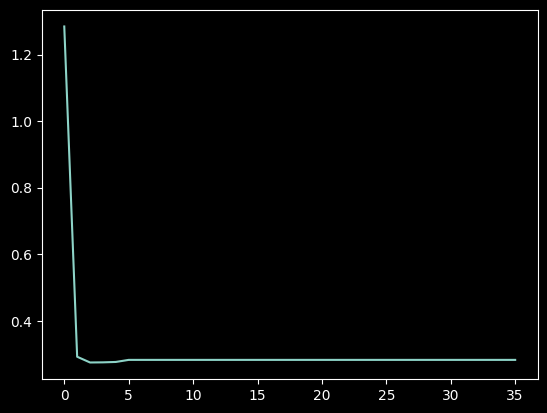

In [6]:
print(errors[0], errors[-1], np.min(errors))
plt.plot(np.arange(36), errors)
plt.show()

In [7]:
print(adaptor_xy.posteriors)

[(0, 1.0)]


In [8]:
# x_data = np.concatenate(adaptor_rte.x_data, axis=0)
# # print(x_data.shape)
# # b = x_data[:, :-1] / 9 + 0.5
# # b = baseline[:, 0]/9 + 0.5
# # print(b.shape)
# # plt.hist(b)
# # plt.show()


# coor = x_data[:, :-1] / 9 + 0.5
# cov = adaptor_rte.kernel(coor) + np.eye(len(coor))*1e-6
# coors = baseline[:, :2].copy()
# matrix = adaptor_rte.kernel((coors/9 + 0.5), coor) @ lg.inv(adaptor_rte.kernel(coor) + np.eye(len(coor))*1e-6)

# print(matrix.shape)

# x_target = x_data[:, -1].reshape(-1, 1)


# plt.hist(matrix @ x_target)
# plt.show()
# plt.imshow(matrix)
# plt.colorbar()
# plt.show()